In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

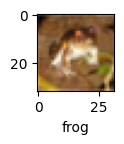

In [12]:
plot_sample(X_train, y_train, 0)

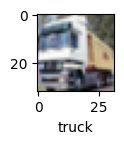

In [13]:
plot_sample(X_train, y_train, 1)

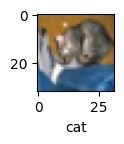

In [14]:
plot_sample(X_test, y_test, 0)

## Scalling the images

In [15]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## One hot encoding

In [16]:
# y_train_categorical = tf.keras.utils.to_categorical(
#     y_train, num_classes=10, dtype="float32"
# )
# y_train_categorical[:5]

In [17]:
# y_test_categorical = tf.keras.utils.to_categorical(
#     y_test, num_classes=10, dtype="float32"
# )
# y_test_categorical[:5]

## Model Building

In [18]:
print(X_train.shape)
f"input layer size = {32*32*3}"

(50000, 32, 32, 3)


'input layer size = 3072'

## ANN

In [19]:
ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)), # I/P Layer
    tf.keras.layers.Dense(3000, activation="relu"),  # Hidden Layer
    tf.keras.layers.Dense(1000, activation="relu"),  # Hidden Layer
    tf.keras.layers.Dense(10, activation="sigmoid") # O/P Layer
])

ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8104 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6214 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5385 - accuracy: 0.4595
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4809 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4300 - accuracy: 0.4965


In [20]:
ann.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4436 - accuracy: 0.4909


[1.4435908794403076, 0.4909000098705292]

In [21]:
y_pred = ann.predict(X_test_scaled)
y_pred_classes = [np.argmax(i) for i in y_pred]
y_pred_classes[:5]

313/313 [==============================] - 0s 1ms/step


[3, 9, 8, 8, 4]

In [22]:
print("ANN Classification Report \n", classification_report(y_test, y_pred_classes))

ANN Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.41      0.51      1000
           1       0.62      0.57      0.59      1000
           2       0.35      0.37      0.36      1000
           3       0.38      0.31      0.34      1000
           4       0.41      0.44      0.42      1000
           5       0.51      0.24      0.33      1000
           6       0.41      0.73      0.53      1000
           7       0.54      0.58      0.56      1000
           8       0.56      0.69      0.62      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



## CNN

In [23]:
# Creating a CNN model
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    # Dense Network
    layers.Flatten(), # I/P Layer
    layers.Dense(64, activation="relu"),  # Hidden Layer
    layers.Dense(10, activation="softmax"),  # Output Layer
])

In [24]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [25]:
cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 3ms/step - loss: 1.4499 - accuracy: 0.4787
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0897 - accuracy: 0.6182
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9544 - accuracy: 0.6671
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8703 - accuracy: 0.6984
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7997 - accuracy: 0.7218
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7448 - accuracy: 0.7425
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6941 - accuracy: 0.7589
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6556 - accuracy: 0.7704
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6149 - accuracy: 0.7833
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.57

In [30]:
cnn.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9267 - accuracy: 0.6969


[0.9267252683639526, 0.6969000101089478]

In [31]:
y_pred_cnn = cnn.predict(X_test_scaled)
y_pred_cnn_classes = [np.argmax(i) for i in y_pred_cnn]
y_pred_cnn_classes[:5]

313/313 [==============================] - 1s 2ms/step


[3, 8, 8, 0, 6]

In [32]:
print("CNN Classification Report \n", classification_report(y_test, y_pred_cnn_classes))

CNN Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      1000
           1       0.84      0.79      0.81      1000
           2       0.69      0.48      0.56      1000
           3       0.53      0.48      0.50      1000
           4       0.57      0.75      0.65      1000
           5       0.58      0.64      0.61      1000
           6       0.79      0.75      0.77      1000
           7       0.79      0.71      0.75      1000
           8       0.74      0.85      0.79      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

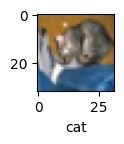

In [34]:
plot_sample(X_test, y_test, 0)

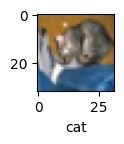

In [35]:
plot_sample(X_test, y_pred_cnn_classes, 0)